In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


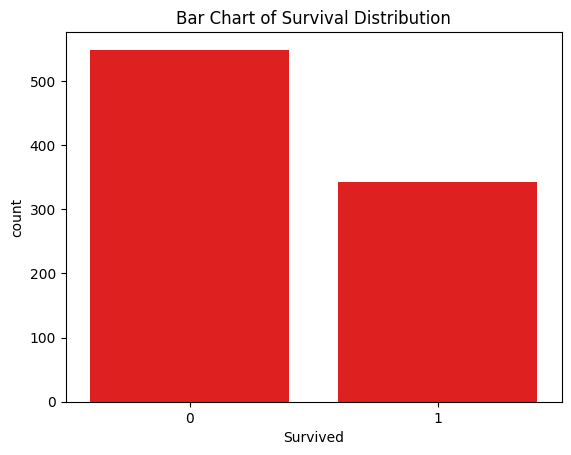

In [ ]:
sns.countplot(x='Survived',data=data, color='red')
plt.title("Bar Chart of Survival Distribution")
plt.show()

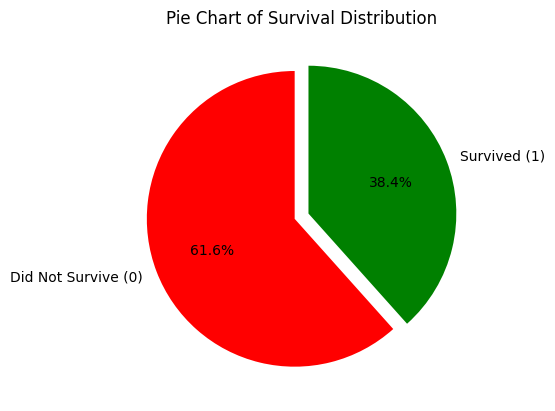

In [ ]:
# plt.figure(figsize=(6,6))
plt.pie(data['Survived'].value_counts(), labels=['Did Not Survive (0)', 'Survived (1)'], autopct='%1.1f%%', startangle=90,
        colors=['red', 'green'], explode=(0.05, 0.05))
plt.title("Pie Chart of Survival Distribution")
plt.show()

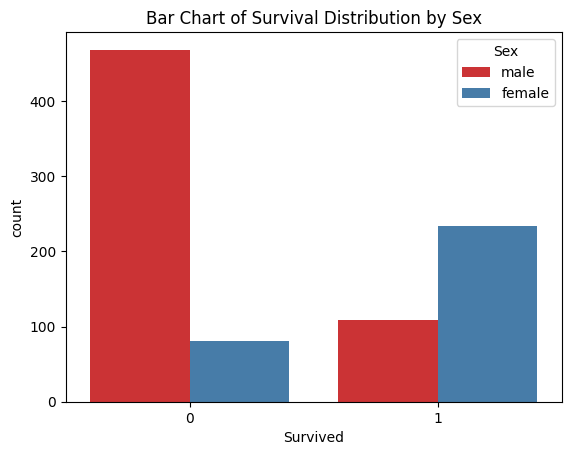

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data, palette='Set1')
plt.title("Bar Chart of Survival Distribution by Sex")
plt.show()

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

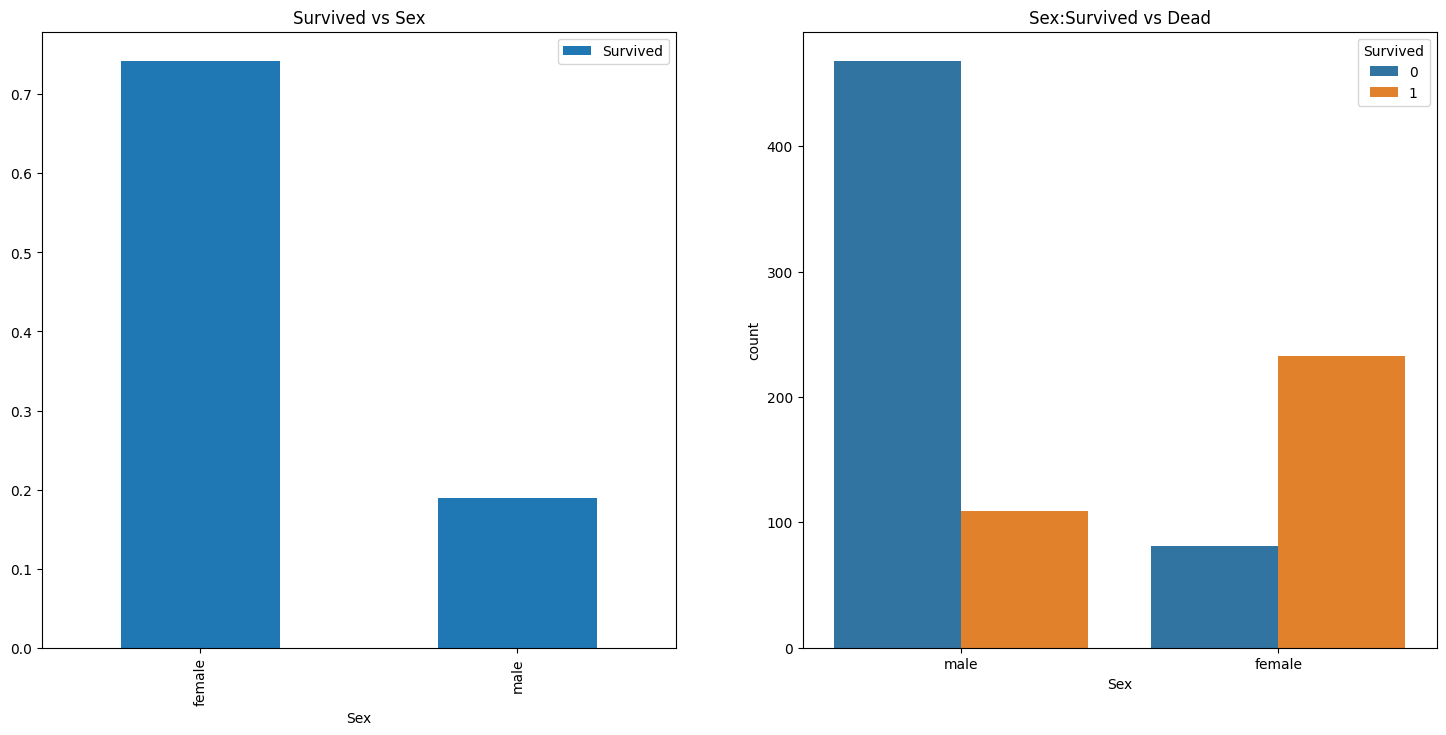

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

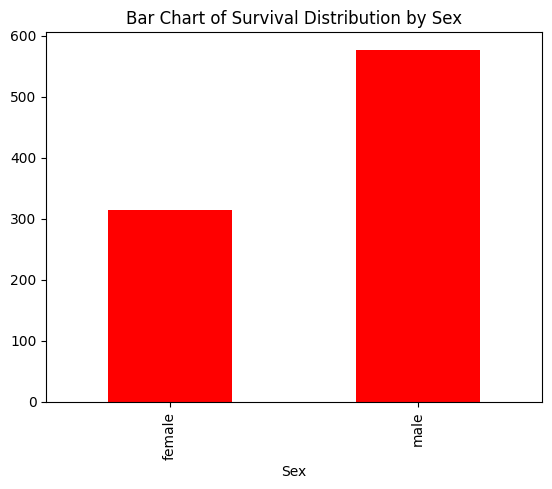

In [ ]:
data.groupby('Sex')['Survived'].count().plot(kind='bar', color='red')
plt.title("Bar Chart of Survival Distribution by Sex")
plt.show()

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
data.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


/tmp/ipython-input-3992416369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=data, palette='viridis')


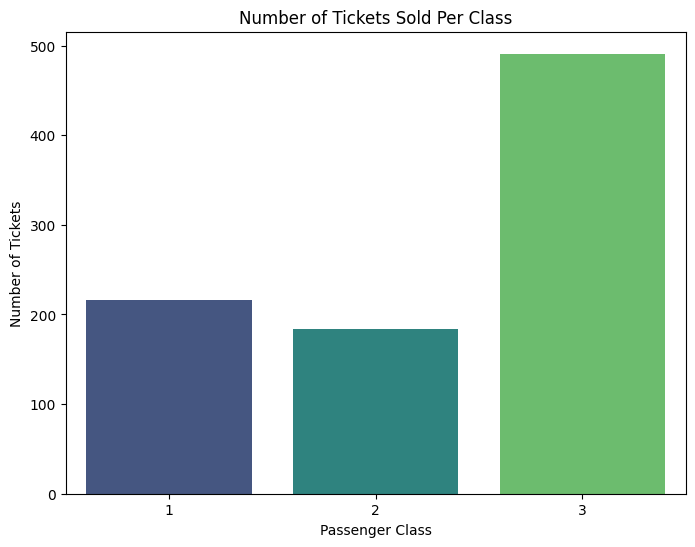

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='viridis')
plt.title("Number of Tickets Sold Per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Tickets")
plt.show()

Text(0, 0.5, 'Number of Tickets')

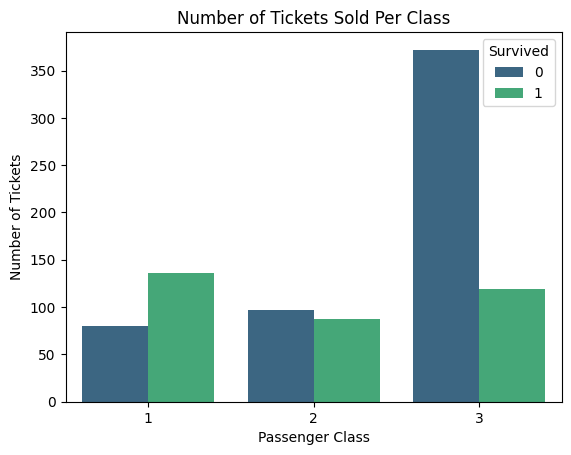

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')
plt.title("Number of Tickets Sold Per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Tickets")

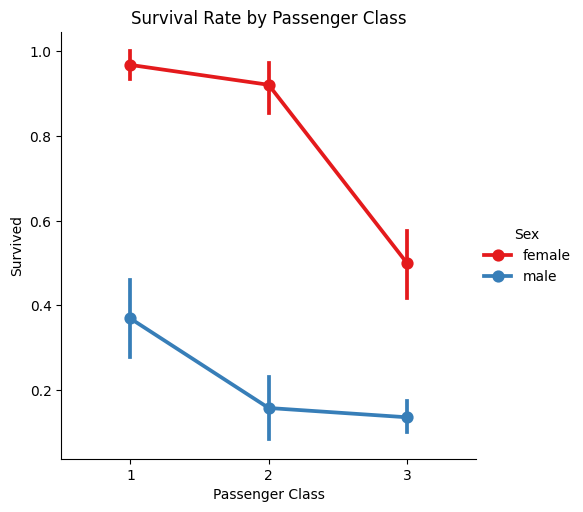

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point', palette='Set1')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.show()

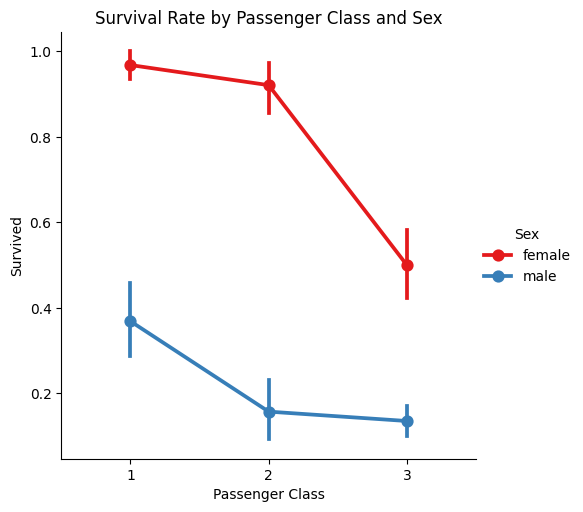

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point', palette='Set1')
plt.title("Survival Rate by Passenger Class and Sex")
plt.xlabel("Passenger Class")
plt.show()

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean().round(2),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.7 Years


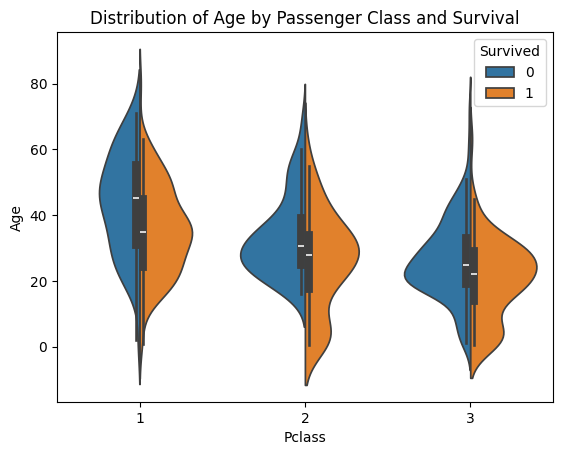

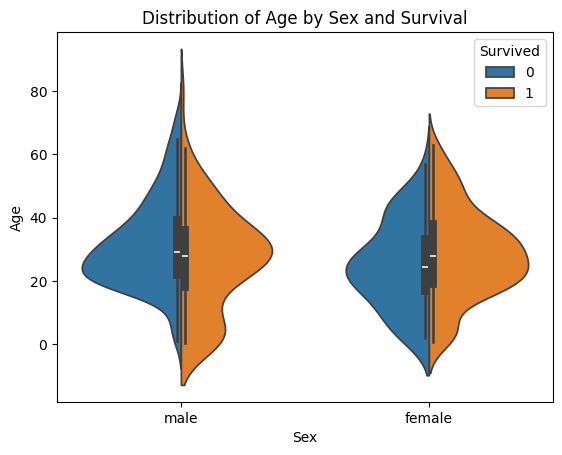

In [ ]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data,split=True)
plt.title('Distribution of Age by Passenger Class and Survival')
plt.show()
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data,split=True)
plt.title('Distribution of Age by Sex and Survival')
plt.show()

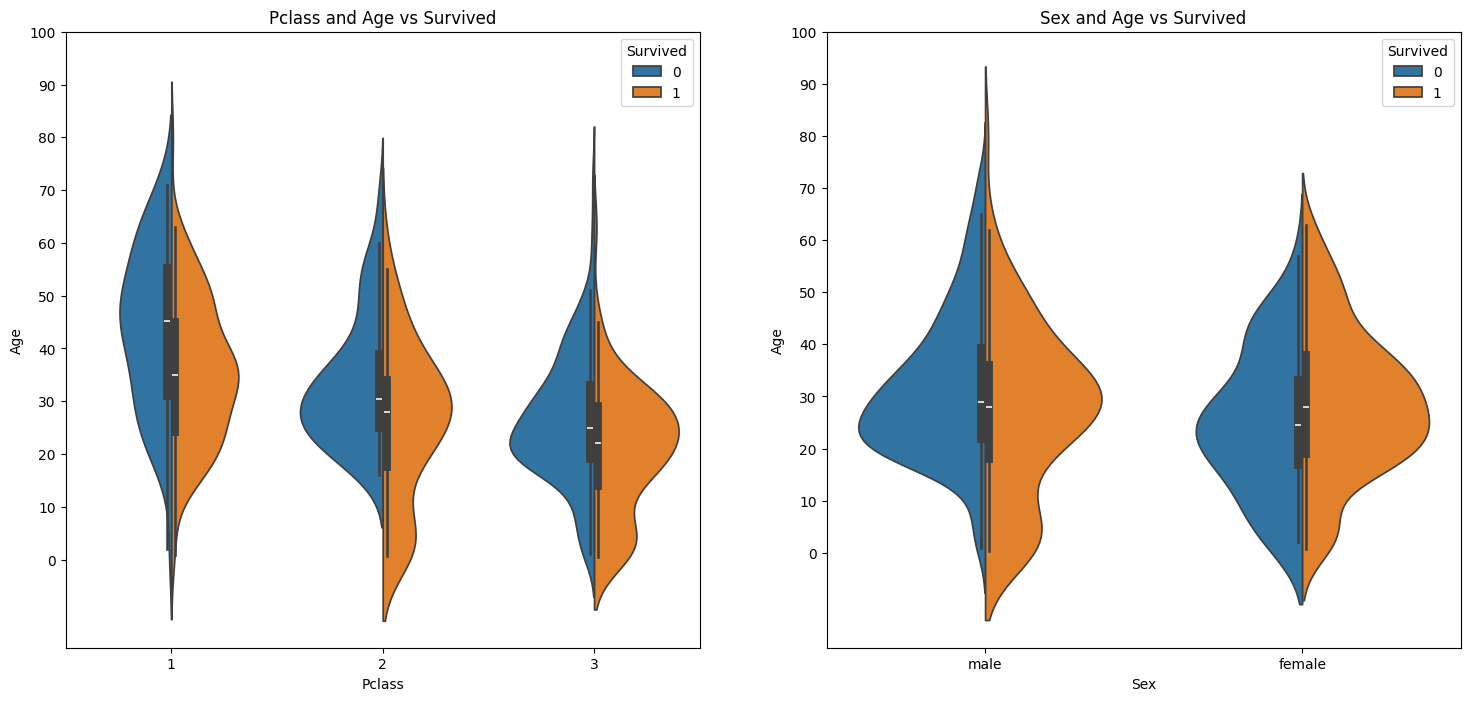

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data,split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [ ]:
data[data['Age']==data['Age'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [ ]:
data[data['Age']==data['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract(r'([A-Za-z]+)\.')



In [ ]:
data['Initial']

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
data['Initial'].value_counts()

,count
Initial,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data['Initial'].value_counts()

,count
Initial,
Mr,529
Miss,186
Mrs,127
Master,40
Other,9


In [ ]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
data.Age.isnull().any() #null values left

np.True_

In [ ]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any() #So no null values left finally

np.False_

<Axes: xlabel='Embarked', ylabel='count'>

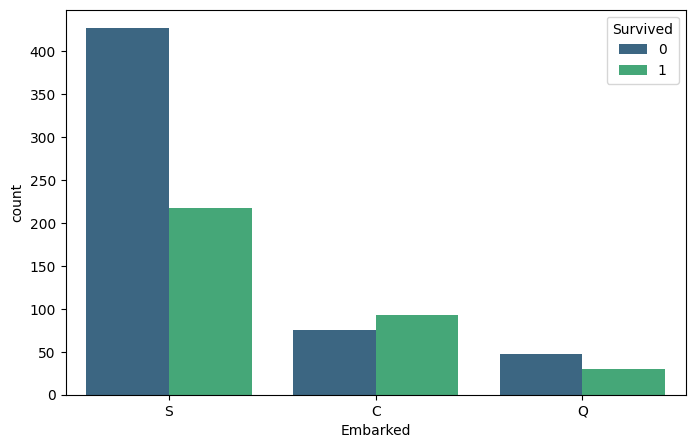

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue='Survived', data=data, palette='viridis')

<Axes: xlabel='Embarked', ylabel='count'>

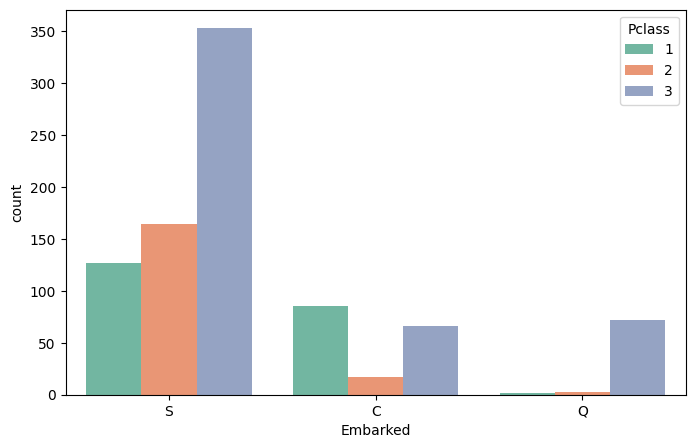

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', hue='Pclass', data=data, palette='Set2')

In [ ]:
data.Embarked.isnull().any()

np.True_

In [ ]:
data.Embarked

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
data['Embarked'].fillna('S', inplace=True)

In [ ]:
data.Embarked.isnull().any()

np.False_

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

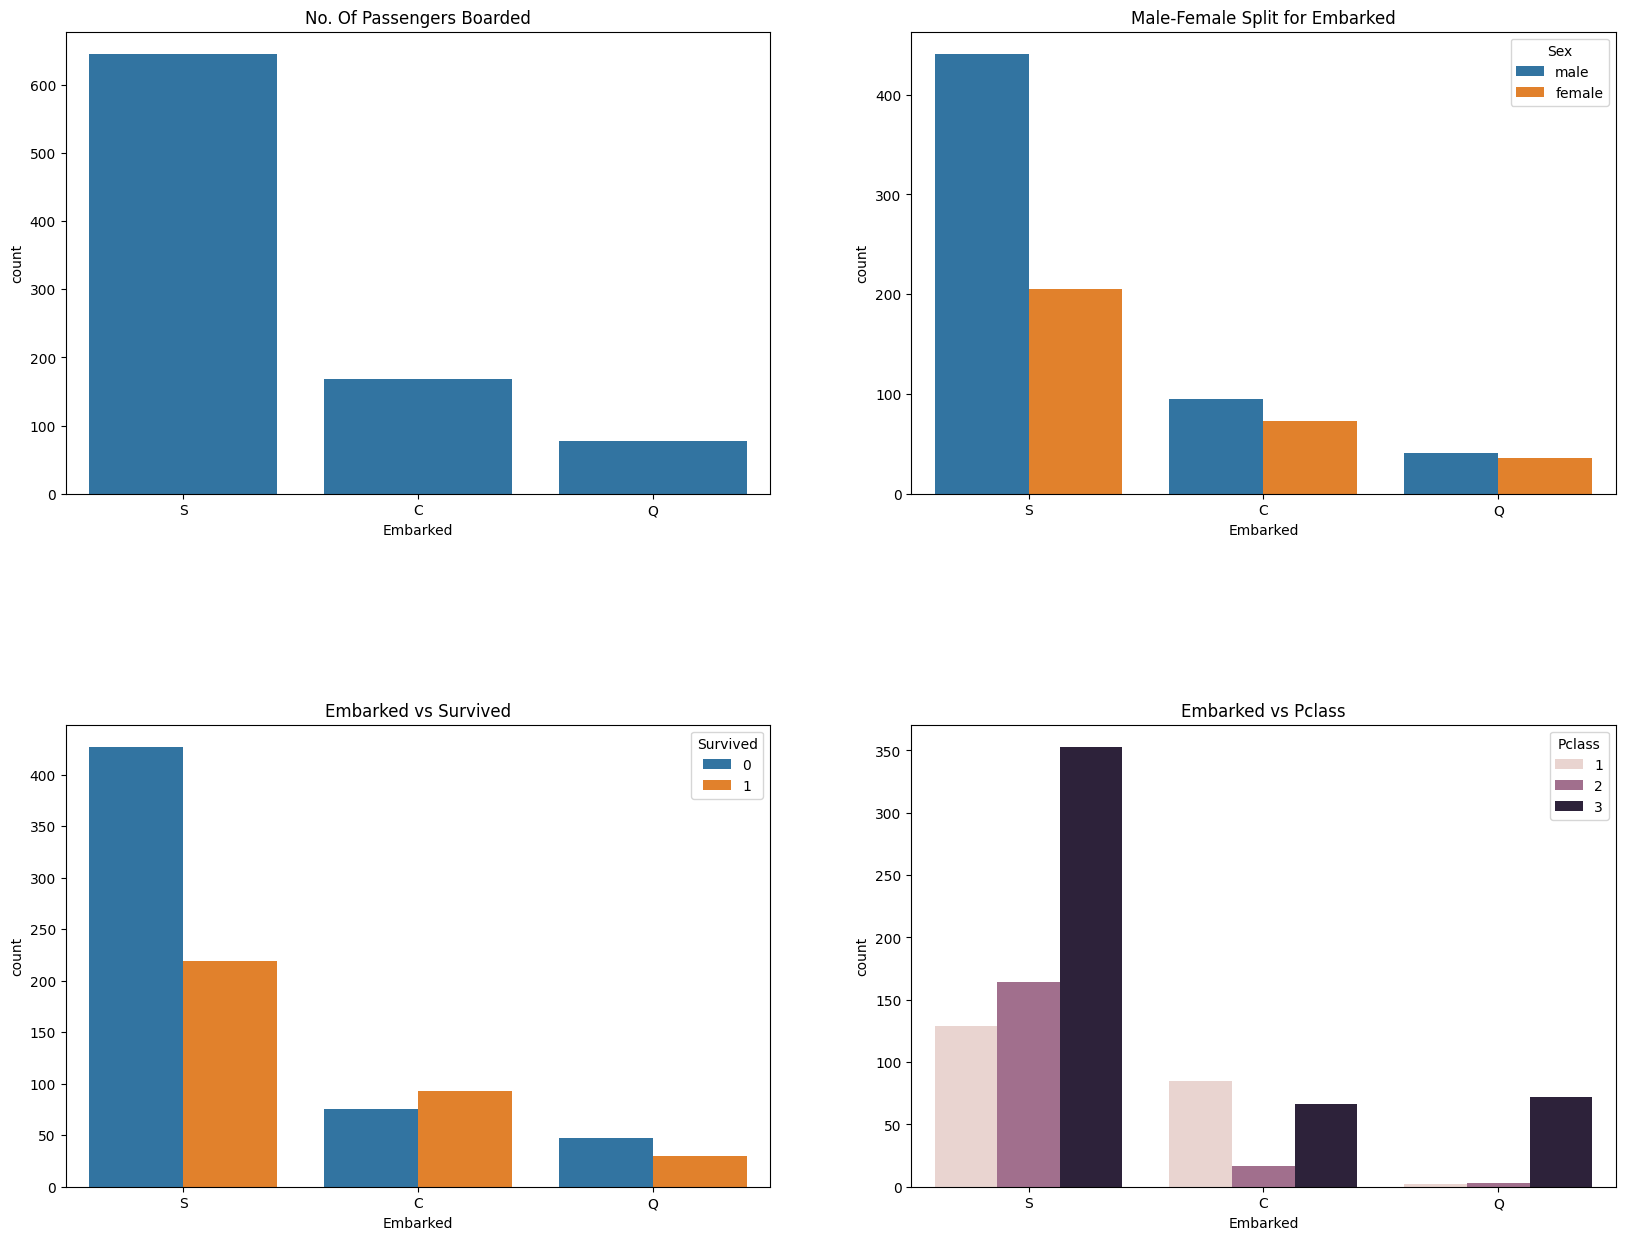

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='inferno')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


/tmp/ipython-input-261390843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0], palette='Set2')


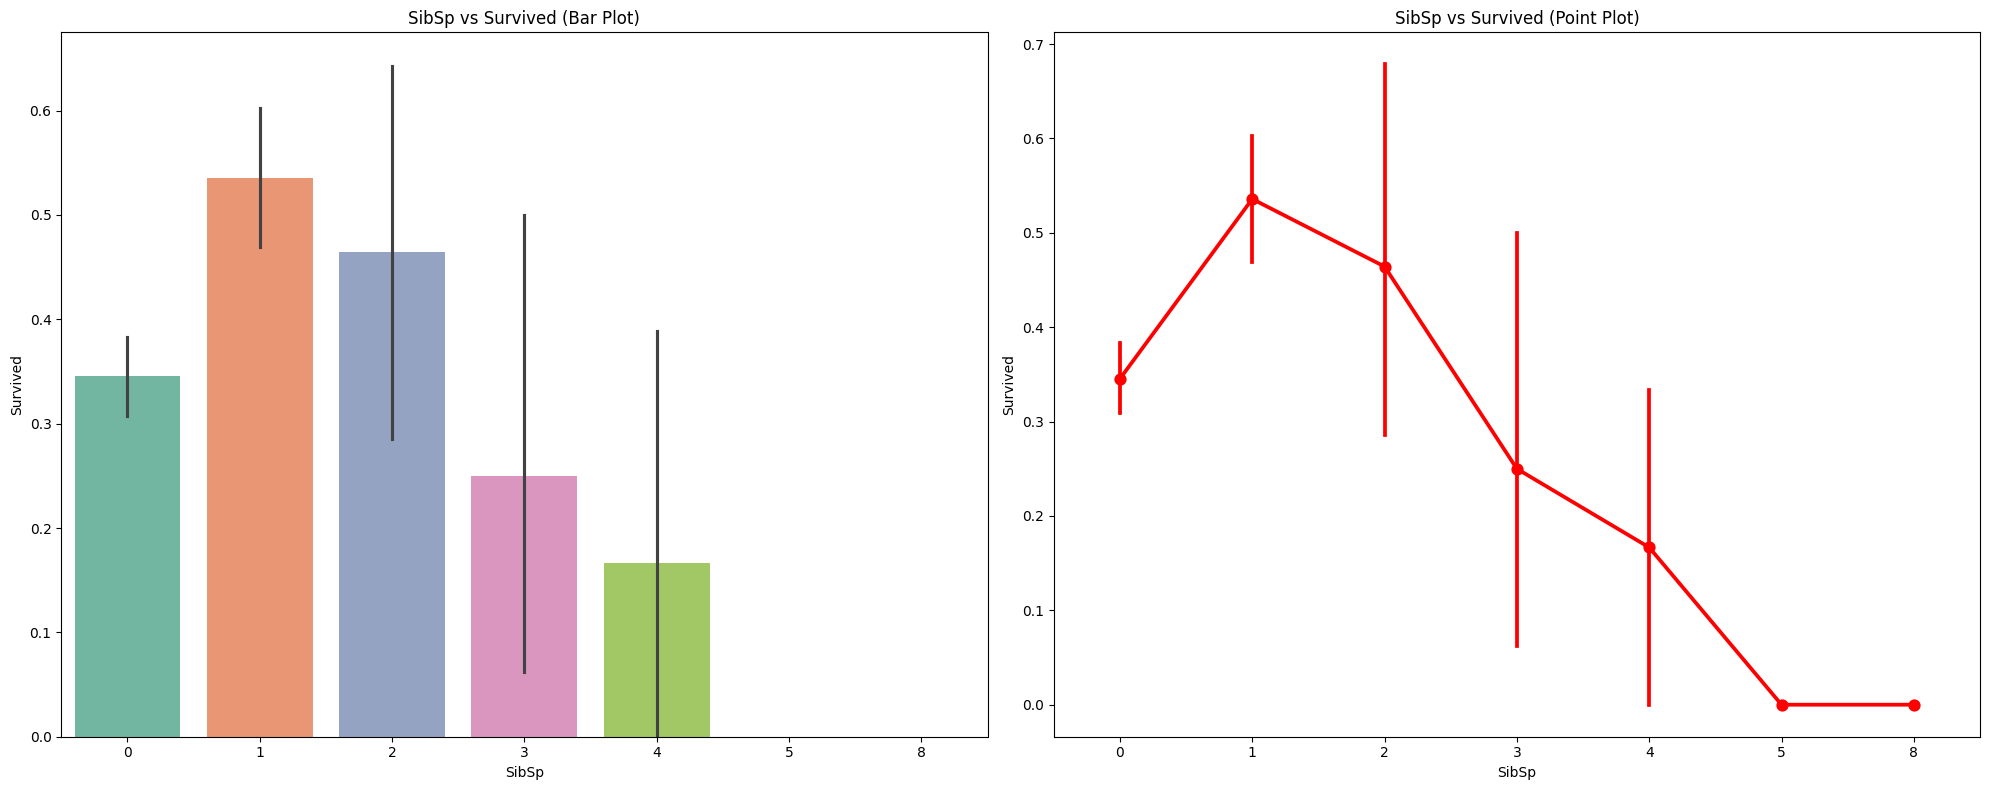

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0], palette='Set2')
ax[0].set_title('SibSp vs Survived (Bar Plot)')

# Point plot — use ax[1] directly instead of sns.catplot
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1], color='red')
ax[1].set_title('SibSp vs Survived (Point Plot)')

plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


/tmp/ipython-input-4287185213.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0], palette='coolwarm')


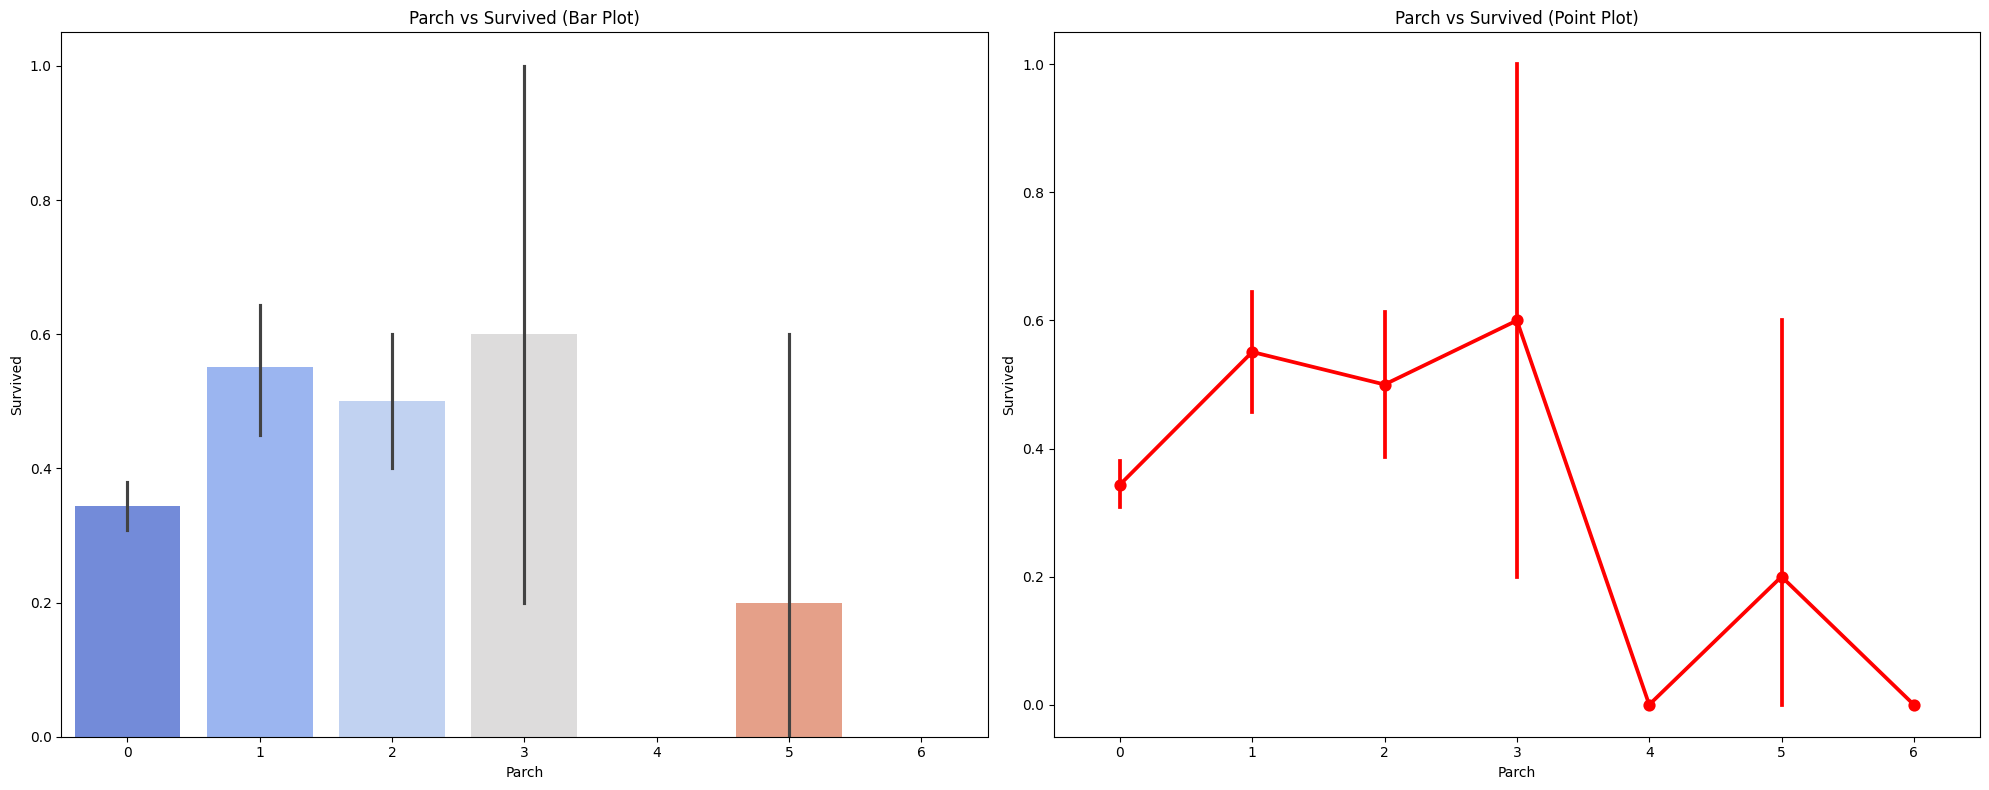

In [ ]:

# Create 1x2 subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# --- Bar Plot ---
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0], palette='coolwarm')
ax[0].set_title('Parch vs Survived (Bar Plot)')

# --- Point Plot (replaces factorplot) ---
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1], color='red')
ax[1].set_title('Parch vs Survived (Point Plot)')

plt.tight_layout()
plt.show()


In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


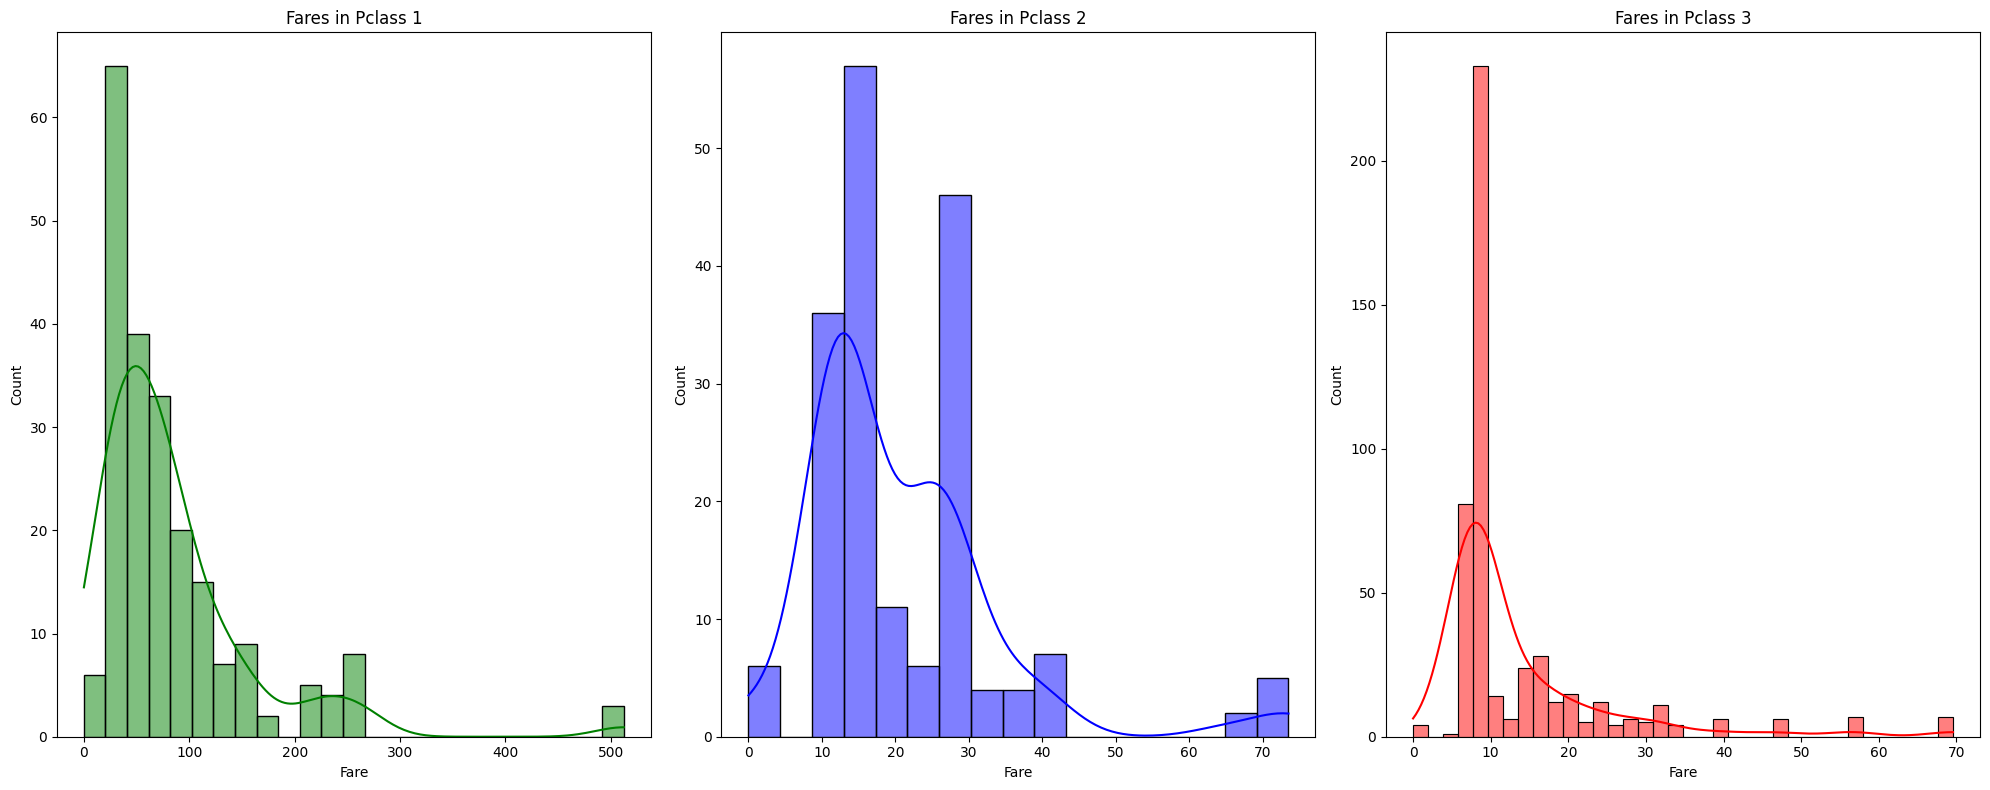

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20,8))

# Pclass 1
sns.histplot(data=data[data['Pclass']==1], x='Fare', kde=True, color='green', ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# Pclass 2
sns.histplot(data=data[data['Pclass']==2], x='Fare', kde=True, color='blue', ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# Pclass 3
sns.histplot(data=data[data['Pclass']==3], x='Fare', kde=True, color='red', ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.tight_layout()
plt.show()


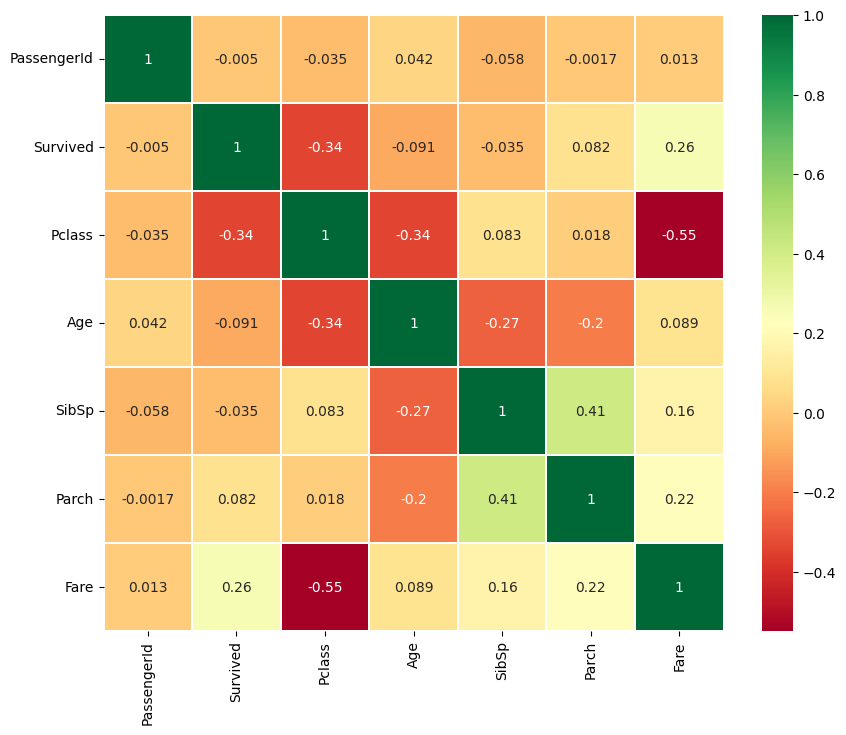

In [ ]:
sns.heatmap(data.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Initial'], axis=1).corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

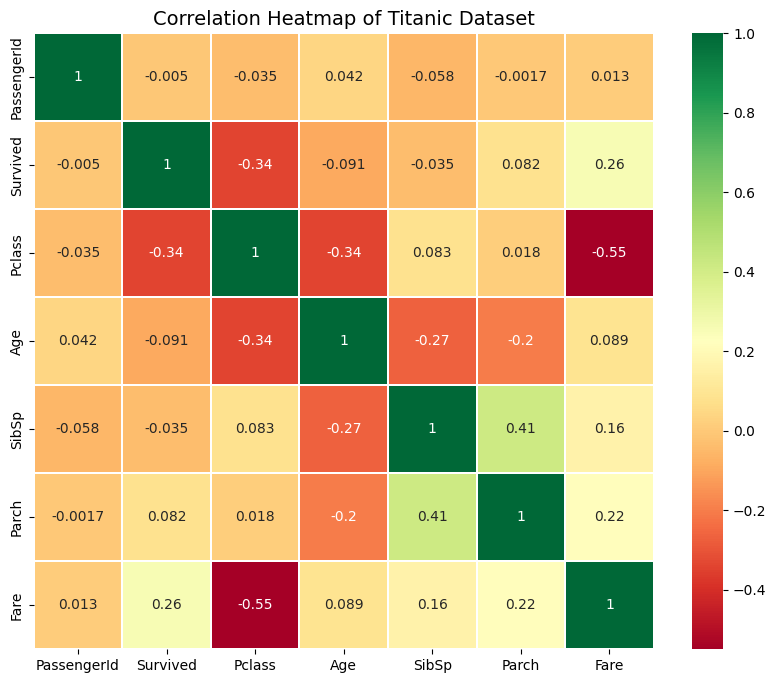

In [ ]:
# Compute correlation matrix (numeric columns only)
corr = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.2)

plt.title('Correlation Heatmap of Titanic Dataset', fontsize=14)
plt.show()

In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


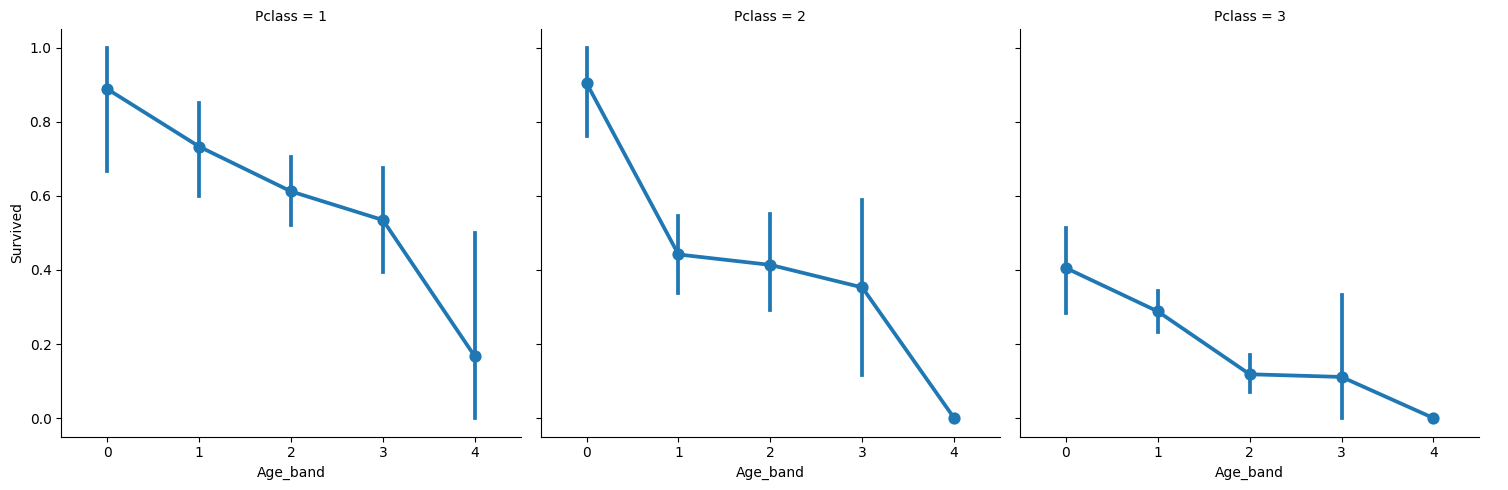

In [ ]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind='point')
plt.show()

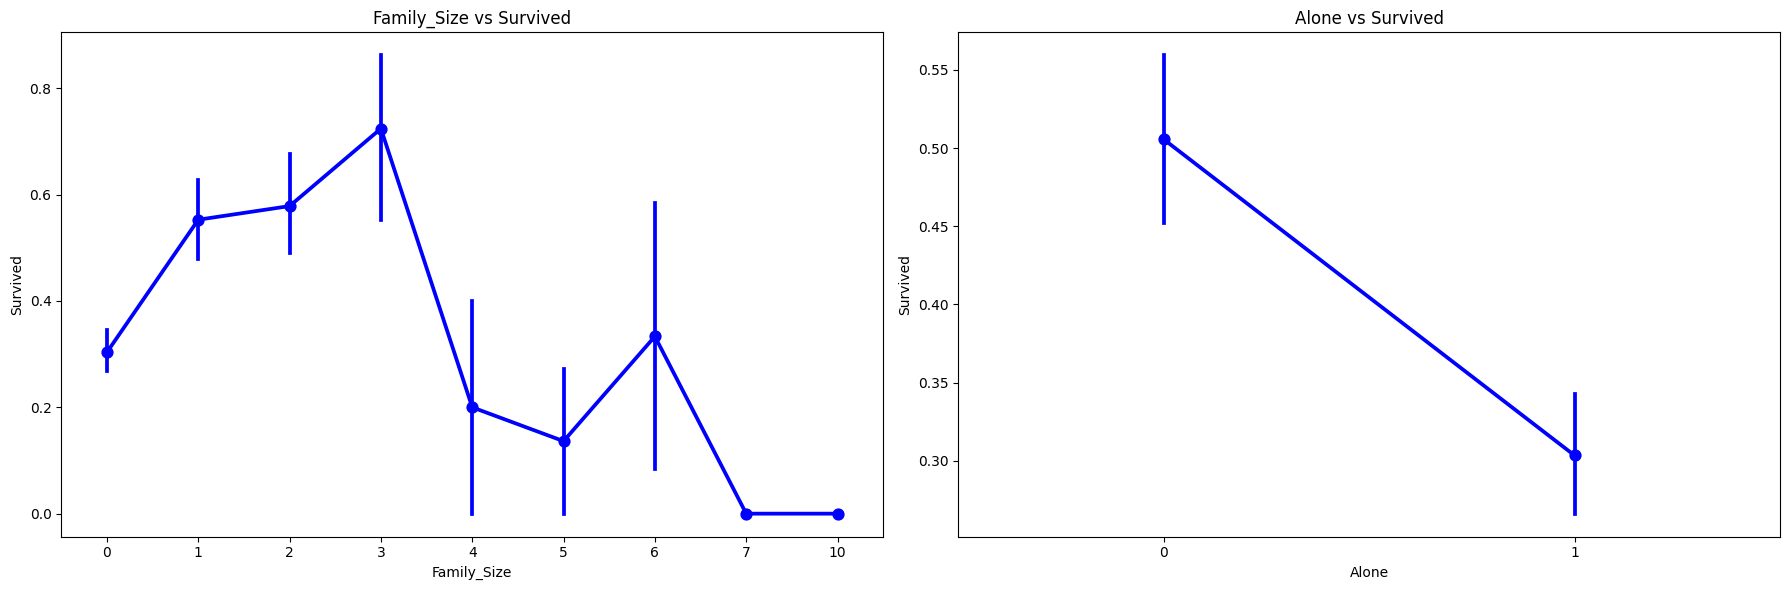

In [ ]:
# Create new features
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

# Visualization
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# Family_Size vs Survived
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0], color='blue')
ax[0].set_title('Family_Size vs Survived')

# Alone vs Survived
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1], color='blue')
ax[1].set_title('Alone vs Survived')

plt.tight_layout()
plt.show()

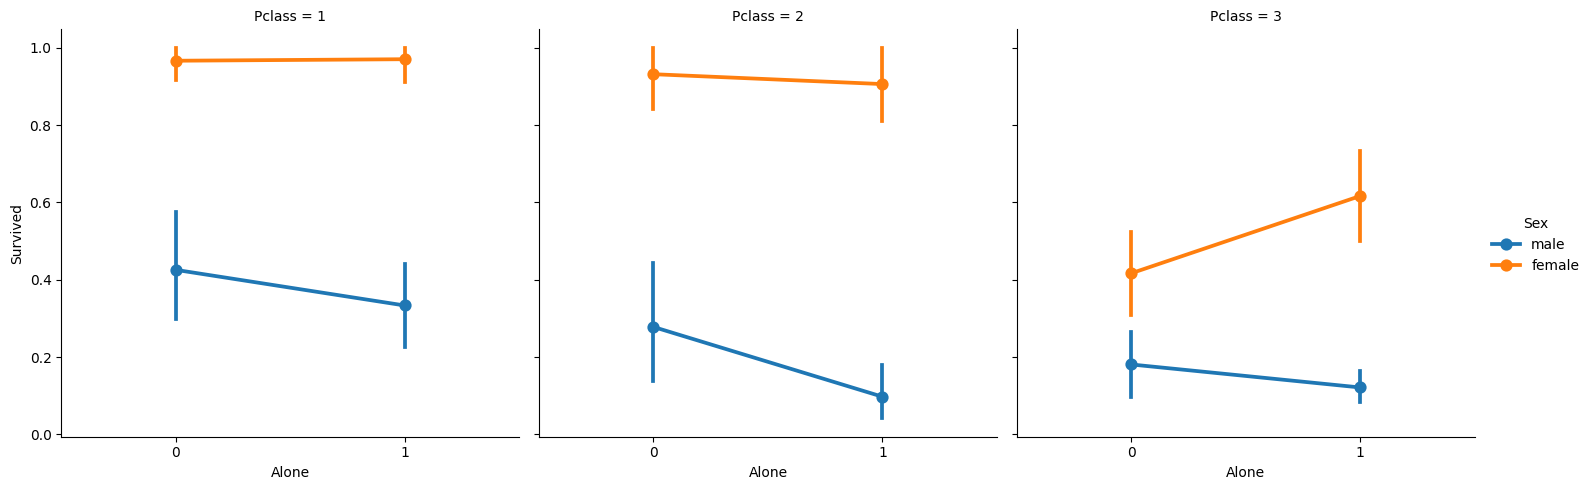

In [ ]:
import matplotlib.pyplot as plt

sns.catplot(x='Alone', y='Survived', hue='Sex', col='Pclass', data=data, kind='point', height=5, aspect=1)  # same as old factorplot default
plt.show()

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


/tmp/ipython-input-184542295.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

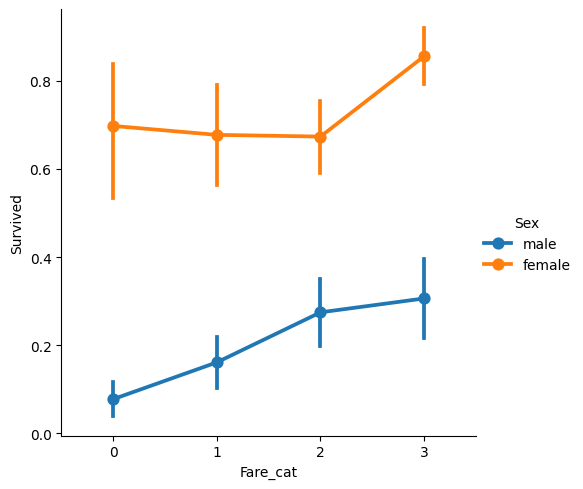

In [ ]:
sns.catplot(x='Fare_cat', y='Survived', hue='Sex', data=data, kind='point'); plt.show()


In [ ]:
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)
data.head()

/tmp/ipython-input-3999389886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace(['male','female'], [0,1], inplace=True)
/tmp/ipython-input-3999389886.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


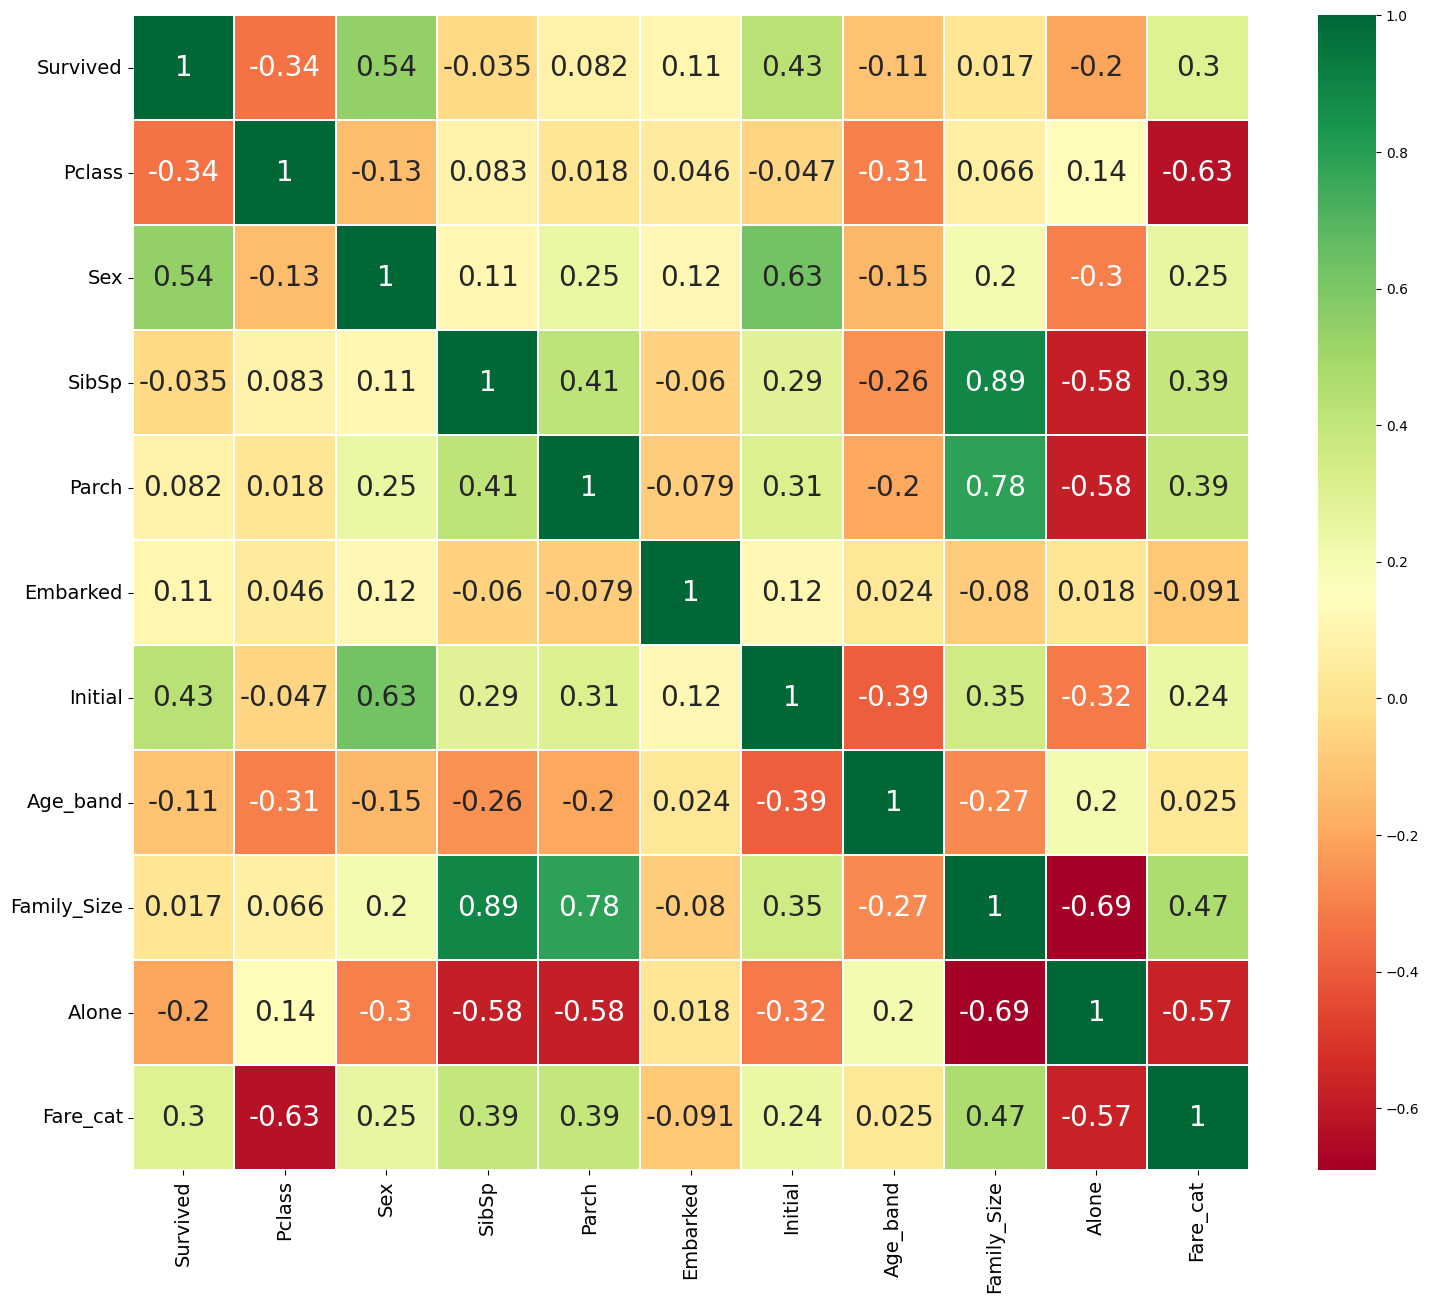

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   SibSp        891 non-null    int64
 4   Parch        891 non-null    int64
 5   Embarked     891 non-null    int64
 6   Initial      891 non-null    int64
 7   Age_band     891 non-null    int64
 8   Family_Size  891 non-null    int64
 9   Alone        891 non-null    int64
 10  Fare_cat     891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


# **Predictive Modelling**

In [ ]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
# print(train)
# print(test)
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


Cross Validation for Logistic Regression and Decision Tree using heat map


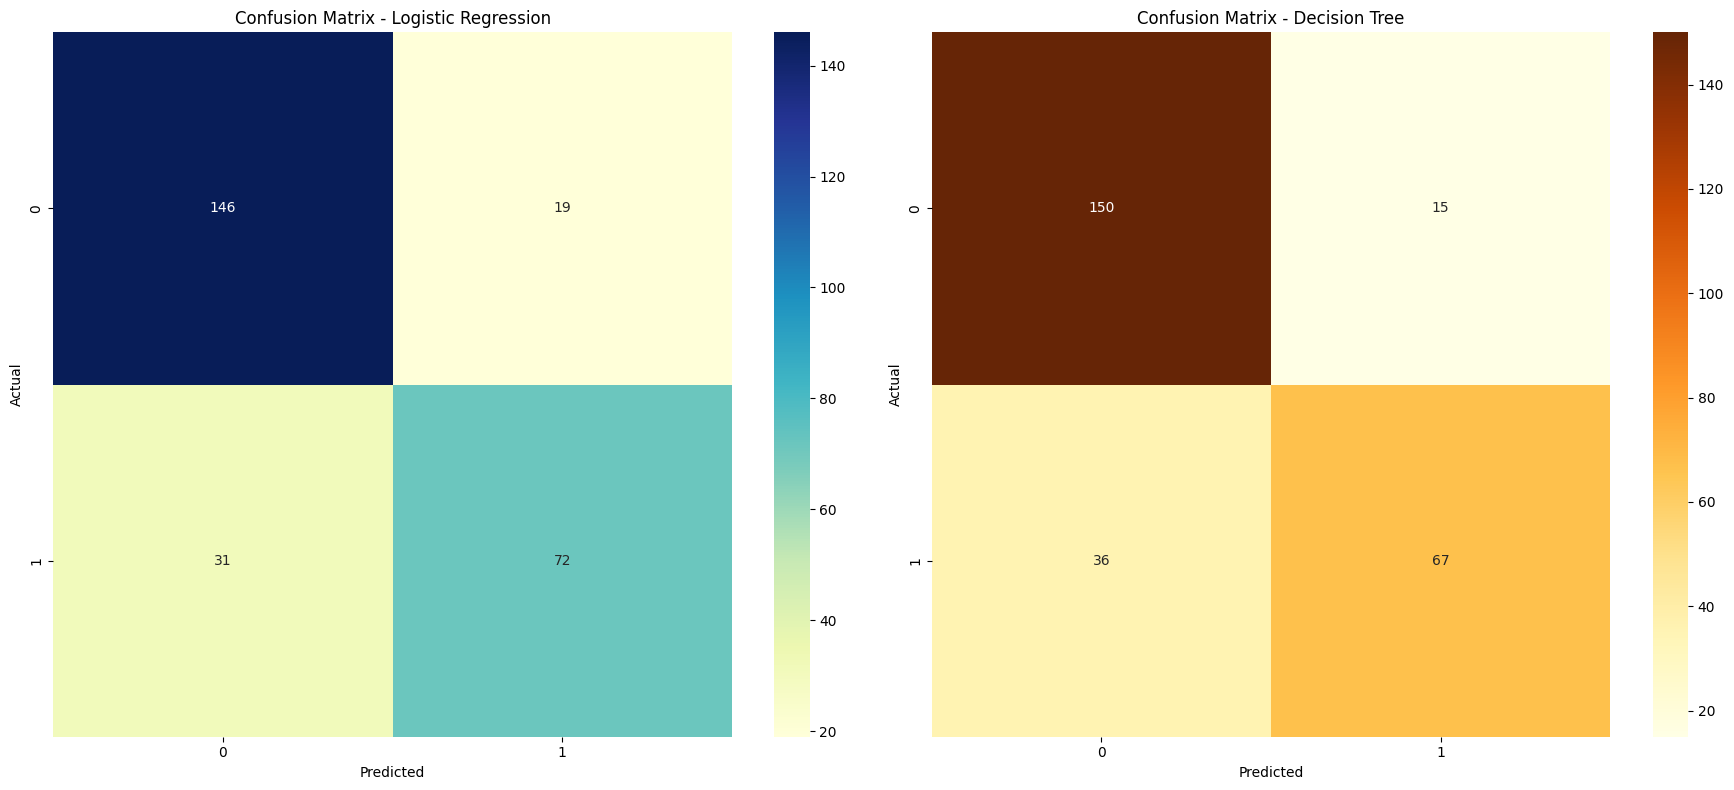

In [ ]:
# 🔹 Create two subplots for side-by-side confusion matrices
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 🔹 Logistic Regression Confusion Matrix
ax[0].set_title('Confusion Matrix - Logistic Regression')
sns.heatmap(confusion_matrix(test_Y, prediction3), annot=True, fmt='.0f', cmap='YlGnBu', ax=ax[0])
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# 🔹 Decision Tree Confusion Matrix
ax[1].set_title('Confusion Matrix - Decision Tree')
sns.heatmap(confusion_matrix(test_Y, prediction4), annot=True, fmt='.0f', cmap='YlOrBr', ax=ax[1])
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Using Cross_Validation

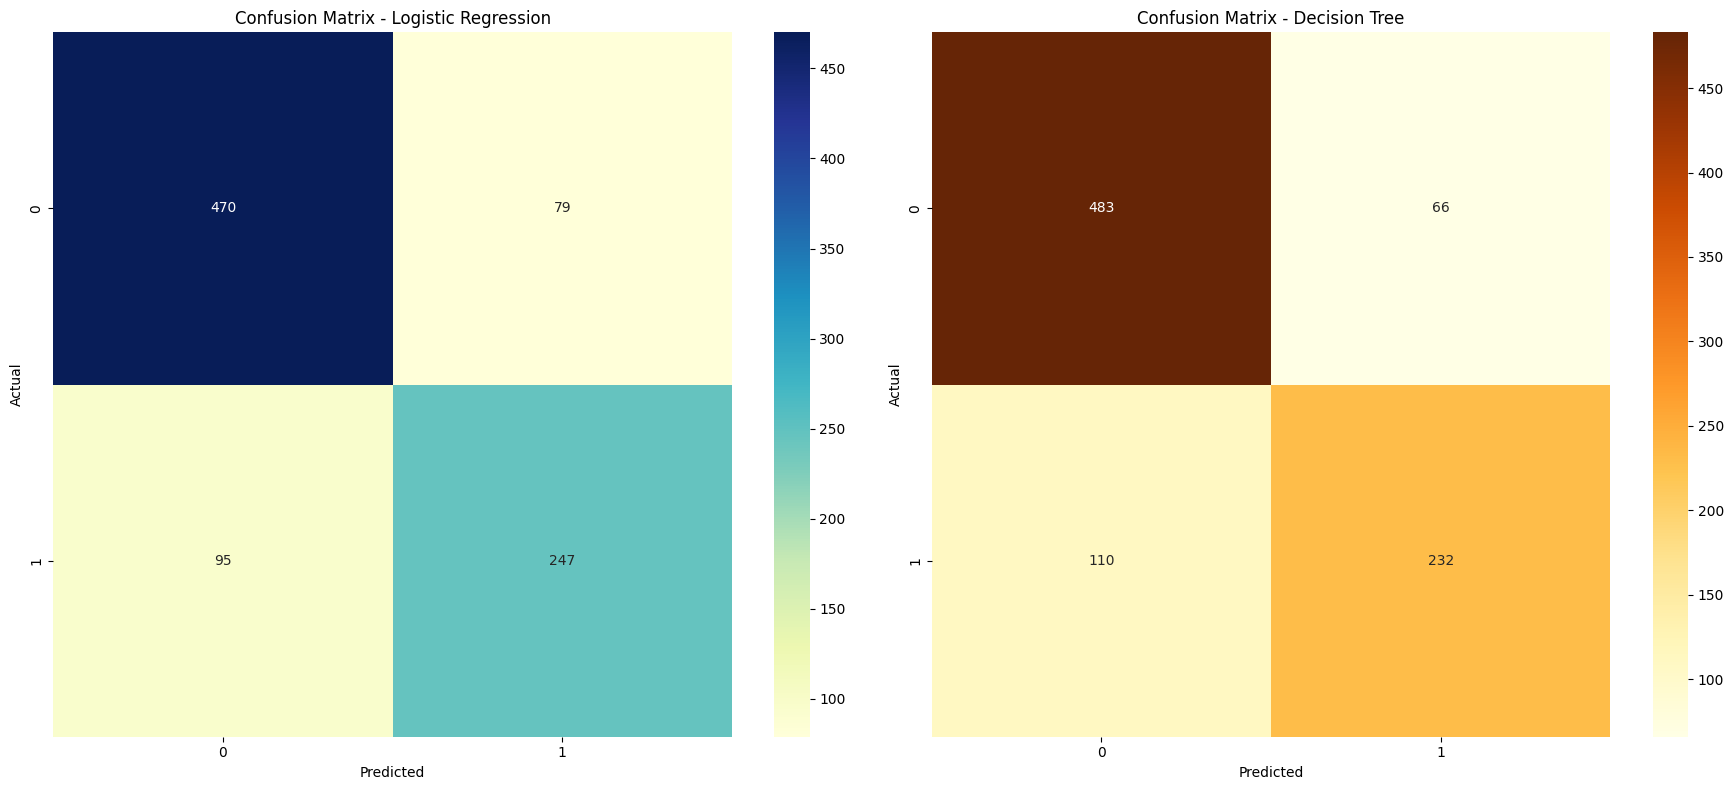

In [ ]:
from sklearn.model_selection import cross_val_predict

# 🔹 Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Logistic Regression Confusion Matrix
y_pred_lr = cross_val_predict(LogisticRegression(max_iter=500), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred_lr), annot=True, fmt='.0f', cmap='YlGnBu', ax=ax[0])
ax[0].set_title('Confusion Matrix - Logistic Regression')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Decision Tree Confusion Matrix
y_pred_dt = cross_val_predict(DecisionTreeClassifier(random_state=0), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred_dt), annot=True, fmt='.0f', cmap='YlOrBr', ax=ax[1])
ax[1].set_title('Confusion Matrix - Decision Tree')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()
